In [7]:
import tools
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [73]:
import pandas as pd
import numpy as np
import analyze
df = pd.read_csv('data.csv')

In [9]:
data = np.array(df)

In [10]:
data_smisleno = data[np.logical_and(data<7, data>0.75)]

In [13]:
def log_likelihood(x):
    def function(parm):
        w = parm[0]
        tau = parm[1]
        t1=0.75
        t2=9
        y = w * 1/tau * 1/(np.exp(-t1/tau)-np.exp(-t2/tau)) * np.exp(-x/tau) + (1-w) * 1/(t2-t1)
        return -np.sum(np.log(y))
    return function


In [14]:
log_likelihood(data_smisleno)([0.61, 2.041])

3358.368118689833

In [15]:
def function1(x, w, tau):
    t1=0.75
    t2=9
    y = w * 1/tau * 1/(np.exp(-t1/tau)-np.exp(-t2/tau)) * np.exp(-x/tau) + (1-w) * 1/(t2-t1)
    #likelihood = np.sum( stats.norm.logpdf(ydata, loc=yPred, scale=sd ) )
    return y

<function matplotlib.pyplot.show(close=None, block=None)>

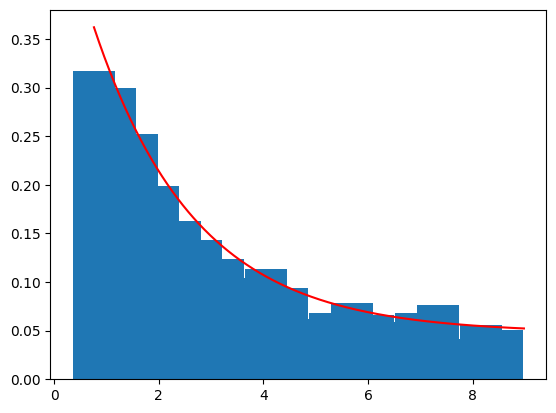

In [16]:
import scipy
data_smisleno = data[np.logical_and(data<9, data>0.75)]
popt = scipy.optimize.minimize(log_likelihood(data_smisleno), [0.2,2.2], bounds=[(0,1), (1, 3)])
hessinv_matrix = np.asmatrix(popt.hess_inv.todense())
[w, tau] = popt.x
[w_err, tau_err] = np.sqrt(np.diagonal(hessinv_matrix))
counts, bins = np.histogram(data_smisleno, bins=20)
counts= (counts / data_smisleno.size) / (bins[1]-bins[0])
data_smisleno.sort()
plt.plot(data_smisleno, function1(data_smisleno, popt.x[0], popt.x[1]), color="r")
plt.bar(bins[:-1], counts)
plt.show

In [17]:
likelihood = log_likelihood(data_smisleno)

In [138]:
def estimate_standard_deviation1(data, params):
    likelihood = log_likelihood(data)
    init_like = likelihood(params)
    p_err = np.zeros(len(params))
    for i,parameter in enumerate(params):
        p_like = 0
        while (p_like - init_like) <= 0.5:
            p_err[i] += 0.0001
            new_params = np.zeros(len(params))
            new_params[i] = p_err[i]
            new_params = new_params + params
            p_like = likelihood(new_params)
    return p_err

def estimate_standard_deviation(data, params, lower_cutoff=0.75, higher_cutoff=9):
    likelihood = analyze.neg_log_likelihood(data, lower_cutoff, higher_cutoff)
    init_like = likelihood(params)
    p_err = np.zeros(len(params))
    for i,parameter in enumerate(params):
        for k in range(-1, 5):
            continue_l = True
            while continue_l:
                new_params = np.zeros(len(params))
                new_params[i] = p_err[i] + 10 ** (-k)
                new_params = new_params + params
                p_like = likelihood(new_params)
                print (p_like - init_like)
                if (p_like - init_like) >= 0.5 or np.isnan(p_like - init_like):
                    continue_l = False
                else:
                    p_err[i] += 10 ** (-k)
    return p_err

In [139]:
[w_err, tau_err] = estimate_standard_deviation(data_smisleno, [w, tau])
print (tau_err, w_err)

nan
nan
11.540855242877115
0.10897418350577937
0.43829673162963445
0.9917906120326734
0.48349250418368683
0.5309337158569178
0.4881355142738357
0.49280098274766715
0.4974889136274214
0.5021993109421601
259.0807653791053
31.418739692257986
0.5295101515130227
0.005617910990622477
0.02232044002676048
0.049888327986082004
0.08810638590921371
0.13676341237578526
0.1956521128663553
0.2645690210661087
0.3433144220571194
0.4316922773182341
0.5295101515130227
0.44105240824364955
0.4505067459690508
0.46005510037139175
0.4696972816800553
0.4794331004754895
0.48926236768602394
0.4991848945928723
0.5092004928228562
0.5001822693106988
0.097 0.0213


/mnt/storage/Projects/Mulan/analyze.py:12: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(y))


In [69]:
def quadratic (x, tau, tau_err):
    return 0.5*(1/(tau_err))**2*(x-tau)**2+likelihood([w, tau])

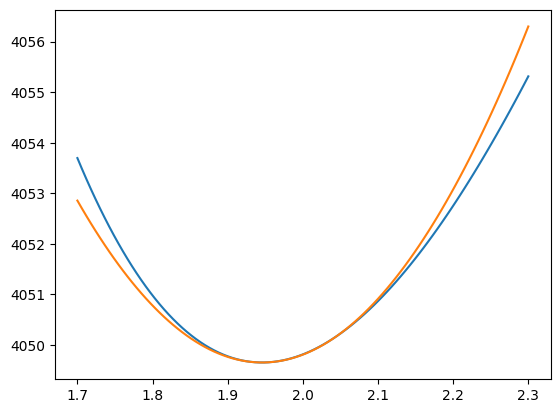

In [70]:
x = np.linspace(1.7, 2.3, 100)
y = np.array([likelihood([w, i]) for i in x])
plt.plot (x,y)
plt.plot (x, quadratic(x, tau, tau_err))
#plt.vlines(x=tau, ymin=0, ymax=1000)

In [71]:
print(tau, tau_err)

1.9458351437132864 0.09710000000000175


In [37]:
0.3*tau_err

0.09643429768736907

In [72]:
likelihood([w, tau+tau_err])-likelihood([w, tau])

0.5001822693116083

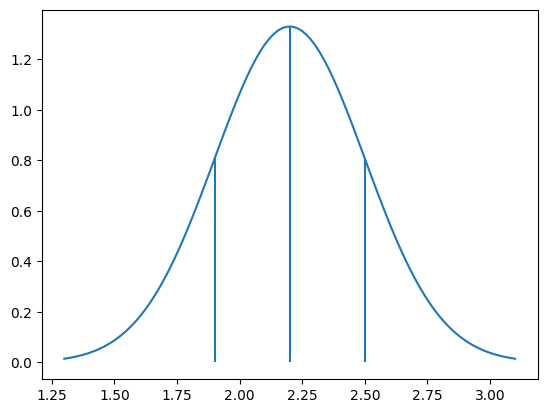

In [6]:
import scipy
from matplotlib import pyplot as plt
import numpy as np

mu = 2.2
sigma = 0.3
x = np.linspace(mu-3*sigma, mu+3*sigma, 100)
plt.plot (x, scipy.stats.norm.pdf(x, mu, sigma))
plt.vlines(mu, 0, scipy.stats.norm.pdf(mu, mu, sigma))
plt.vlines(mu+sigma, 0, scipy.stats.norm.pdf(mu+sigma, mu, sigma))
plt.vlines(mu-sigma, 0, scipy.stats.norm.pdf(mu-sigma, mu, sigma))

In [3]:
scipy.stats.norm.pdf(mu, mu, sigma)

1.329807601338109

In [38]:
hessinv_matrix

matrix([[0.01460035, 0.03666506],
        [0.03666506, 0.1033286 ]])

In [39]:
np.sqrt(np.diagonal(hessinv_matrix))

array([0.12083192, 0.32144766])